In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def compute_error_on_given_point(b,m,points):
    totalError = 0 
    for i in range(0,len(points)):
        x = points[i,0]
        y = points[i,1]
        totalError = totalError + (y - (m * x + b)) ** 2
    return totalError/float(len(points))

def step_gradient(b_current,m_current,points,learning_rate):
    b_gradient = 0 
    m_gradient = 0 
    N = float(len(points))
    for i in range(0,len(points)):
        x = points[i,0]
        y = points[i,1]
        b_gradient += -(2/N) * (y - ((m_current*x)+b_current))
        m_gradient += -(2/N) * x * (y - ((m_current*x)+b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return[new_b , new_m]

In [40]:
def gradient_descent_runner(points,starting_m,starting_b,learning_rate,num_iterations):
    b = starting_b 
    m = starting_m 
    for i in range(num_iterations):
        b , m = step_gradient(b,m,np.array(points),learning_rate)
    return [b,m]

In [41]:
def run():
    points = np.genfromtxt('data.csv',delimiter = ',')
    x = points[:,0]
    y = points[:,1]
    learning_rate = 0.0001
    initial_m = 0 
    initial_b = 0 
    num_iterations = 1000
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_on_given_point(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_on_given_point(b, m, points)))
    plt.scatter(x,y)
    y_h = m * x + b 
    plt.plot(x,y_h)


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473


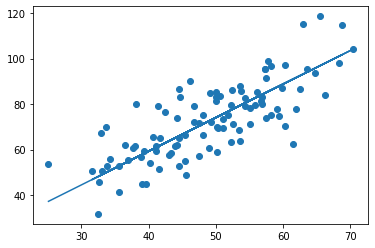

In [42]:
run()